## 箱ひげ図

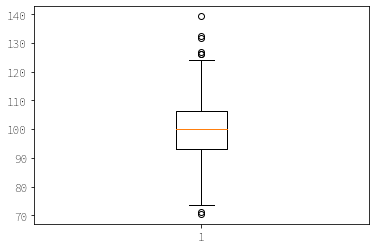

In [1]:
# リスト 4.7.1　箱ひげ図の描画

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)
%matplotlib inline

# 箱ひげ図の描画
values = np.random.normal(100, 10, 1000)
fig, ax = plt.subplots(1, 1)
ax.boxplot(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f499ce144d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f499ce14f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f499ce0ded0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f499cd9ba50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f499cd9bf90>,
 'means': []}

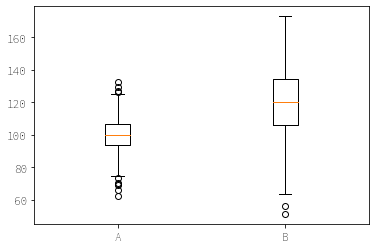

In [2]:
# リスト 4.7.2　複数の箱ひげ図の描画

# データ作成
values_A = np.random.normal(100, 10, 1000)
values_B = np.random.normal(120, 20, 1000)
values_AB = [values_A, values_B]
labels = ["A", "B"]
fig, ax = plt.subplots(1, 1)

# データとラベルを指定
ax.boxplot(values_AB, labels=labels)

In [3]:
# リスト 4.7.3　anime_master.csv ファイルの読み込み

from urllib.parse import urljoin
import pandas as pd

base_url = "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_master_csv = urljoin(base_url, "anime_master.csv")
df = pd.read_csv(anime_master_csv, index_col="anime_id")
df.head(3)

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


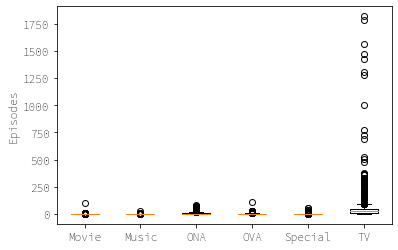

In [4]:
# リスト 4.7.4　メディア種別ごとのエピソード数を可視化

labels = []
types = []

# メディア種別ごとのエピソード数の情報をリスト化
for label, df_per_type in df.groupby("type"):
    labels.append(label)
    types.append(df_per_type["episodes"].tolist())

fig, ax = plt.subplots(1, 1)
ax.boxplot(types, labels=labels)
ax.set_ylabel("Episodes")

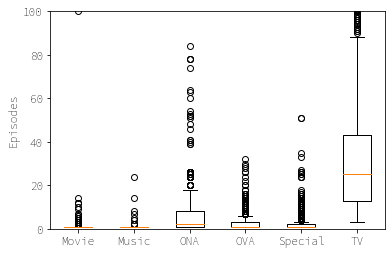

In [5]:
# リスト 4.7.5　描画範囲を限定した箱ひげ図

fig, ax = plt.subplots(1, 1)
ax.boxplot(types, labels=labels)

# Y軸の描画範囲を0から 100までに限定
ax.set_ylim(0, 100)
ax.set_ylabel("Episodes")

In [6]:
# リスト 4.7.6　四分位点の値を describe() で確認

df.groupby("type")["episodes"].describe().T.round(1)

type,Movie,Music,ONA,OVA,Special,TV
count,2220.0,485.0,591.0,1932.0,1517.0,3330.0
mean,1.1,1.1,6.8,2.5,2.5,37.5
std,2.2,1.3,11.5,3.9,3.8,83.3
min,1.0,1.0,1.0,1.0,1.0,3.0
25%,1.0,1.0,1.0,1.0,1.0,13.0
50%,1.0,1.0,2.0,1.0,1.0,25.0
75%,1.0,1.0,8.0,3.0,2.0,43.0
max,100.0,24.0,84.0,110.0,51.0,1818.0


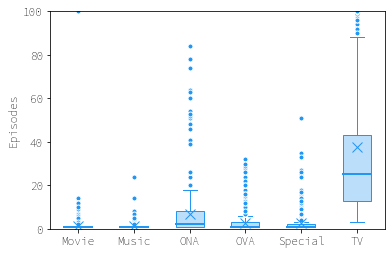

In [7]:
# リスト 4.7.7　書式を一括設定して箱ひげ図を描画

# 書式辞書の作成
# はずれ値の書式辞書
flierprop = {
    "color": "#EC407A",
    "marker": "o",
    "markerfacecolor": "#2196F3",
    "markeredgecolor": "white",
    "markersize": 5,
    "linestyle": "None",
    "linewidth": 0.1,
}

# 箱の書式辞書
boxprop = {
    "color": "#2196F3",
    "facecolor": "#BBDEFB",
    "linewidth": 1,
    "linestyle": "-",
}

# ヒゲの書式辞書
whiskerprop = {"color": "#2196F3", "linewidth": 1, "linestyle": "-"}

# ヒゲ末端キャップの書式辞書
capprop = {"color": "#2196F3", "linewidth": 1, "linestyle": "-"}

# 中央値の書式辞書
medianprop = {"color": "#2196F3", "linewidth": 2, "linestyle": "-"}

# 平均値の書式辞書
meanprop = {
    "color": "#2196F3",
    "marker": "x",
    "markerfacecolor": "#2196F3",
    "markeredgecolor": "#2196F3",
    "markersize": 10,
    "linewidth": 1,
    "linestyle": "",
}

# 書式を設定して箱ひげ図を描画
fig, ax = plt.subplots(1, 1)
ax.boxplot(
    types,
    patch_artist="Patch",
    labels=labels,
    showmeans=True,
    flierprops=flierprop,
    boxprops=boxprop,
    whiskerprops=whiskerprop,
    capprops=capprop,
    medianprops=medianprop,
    meanprops=meanprop,
)

# Y軸の描画範囲を0から 100までに限定
ax.set_ylim(0, 100)

# Y軸ラベルを設定
ax.set_ylabel("Episodes")

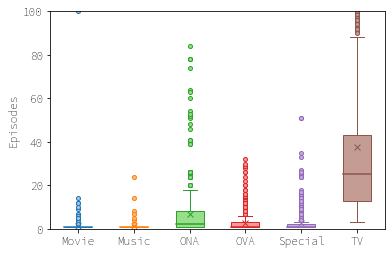

In [8]:
# リスト 4.7.8　グループごとに異なる書式を設定する

# カラーセット作成用にインポート
import matplotlib.cm as cm

# 図の描画
fig, ax = plt.subplots(1, 1)
bp = ax.boxplot(types, patch_artist="Patch", labels=labels, showmeans=True)

# Y軸の描画範囲を0から 100までに限定
ax.set_ylim(0, 100)

# Y軸ラベルを設定
ax.set_ylabel("Episodes")

# 書式設定
# カラーセットを作成
deep_colors = [cm.tab20(i * 2 / 20) for i in range(6)]
pale_colors = [cm.tab20((i * 2 + 1) / 20) for i in range(6)]

# 上下に分かれた要素に設定するための用の数列
n = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]

# 箱とはずれ値、中央値、平均値の書式設定
for params in zip(
    bp["boxes"],
    bp["fliers"],
    bp["medians"],
    bp["means"],
    deep_colors,
    pale_colors,
):
    bpbox, bpflier, bpmedian, bpmean, dcolor, pcolor = params

    # 箱の書式設定
    bpbox.set_color(dcolor)
    bpbox.set_facecolor(pcolor)
    bpbox.set_linewidth(1)

    # 外れ値の書式設定
    bpflier.set(marker="o", color=pcolor, markersize=4)
    bpflier.set_markeredgecolor(dcolor)
    bpflier.set_markerfacecolor(pcolor)
    bpflier.set_linewidth(0.1)

    # 中央値の書式設定
    bpmedian.set_color(dcolor)
    bpmedian.set_linewidth(1.5)

    # 平均値の書式設定
    bpmean.set(marker="x")
    bpmean.set_markeredgecolor(dcolor)

# ヒゲとヒゲの末端キャップの書式設定
for bpcap, bpwhisker, m in zip(bp["caps"], bp["whiskers"], n):
    bpcap.set_color(deep_colors[m])
    bpcap.set_linewidth(1)
    bpwhisker.set_color(deep_colors[m])
    bpwhisker.set_linewidth(1)